# Newton-Cotes rules for integration

- We briefly discuss the *simplest* integration of a function from an evaluation of the
  integrand at equally spaced points.

- We want to integrate $f(x)$ in the interval $[a,b]$ with $N$ points, $\Delta = (b-a)/N$.

&nbsp;
<center><img src="figures/nc_integration.png"/></center>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
plt.style.use('style.mpl')

## Rectangular

\begin{equation*}
\int_a^b f(x) dx = \Delta \sum_{j=0}^{N-1} f \left( a + j \Delta \right) + \mathcal{O}\left(\frac{1}{N}\right). 
\end{equation*}

## Trapezoidal

\begin{equation*}
\int_a^b f(x) dx = \Delta \left [\frac{1}{2}f(a) +  \sum_{j=1}^{N-1}
f\left(a + j \Delta \right) +\frac{1}{2}f(b)\right] + \mathcal{O}\left(\frac{1}{N^2}\right). 
\end{equation*}

## Simpson

\begin{equation*}
\int_a^b f(x) dx = \frac{\Delta}{3} \left \{ f(a) +  \sum_{j=1}^{N-1}\left[3-(-1)^j\right]
f\left(a + j \Delta \right) +f(b)\right\} + \mathcal{O}\left(\frac{1}{N^4}\right). 
\end{equation*}

Here is an implementation of these schemes

In [2]:
def quadrature(f, a, b, N, *params, method='simpson'):
    '''Newton-Cotes methods for numerical integration of f(x) over x.'''
    
    x, Δx = np.linspace(a, b, N, retstep=True)
    fx = np.array([f(v, *params) for v in x])
    
    if method == 'rectangular':
        I = np.sum(fx)
        
    if method == 'trapezoidal':
        I = 0.5 * (fx[0] + fx[N-1])
        I += np.sum(fx[1:N-1])
        
    elif method == 'simpson':
        assert(N%2 == 1)
        I = (fx[0] + fx[N-1]) / 3.0
        I += (4/3) * np.sum(fx[1:N:2])
        I += (2/3) * np.sum(fx[2:N-1:2])
        
    return Δx * I

Let's use Simpson's rule to evaluate the $\mathrm{erf}(1/2)$ where 

\begin{equation*}
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x \mathrm{e}^{-t^2} dt 
\end{equation*}

In [3]:
def erf_kernel(t):
    '''The error function kernel'''
    return  (2.0/np.sqrt(np.pi)) * np.exp(-t**2)

In [4]:
# check quadrature rules
res = quadrature(erf_kernel, 0, 0.5, 2**12+1, method='simpson')
exact = scipy.special.erf(0.5)

print(f'Simpson -> {res:18.16f}')
print(f'Scipy   -> {exact:18.16}')

Simpson -> 0.5204998778130465
Scipy   -> 0.5204998778130465


# Error in Newton-Cotes methods

- Difference between exact result and quadrature with $N$ points
  for
  \begin{equation*}
    \frac{2}{\sqrt{\pi}} \int_0^{1/2} \mathrm{e}^{-t^2} dt
  \end{equation*}

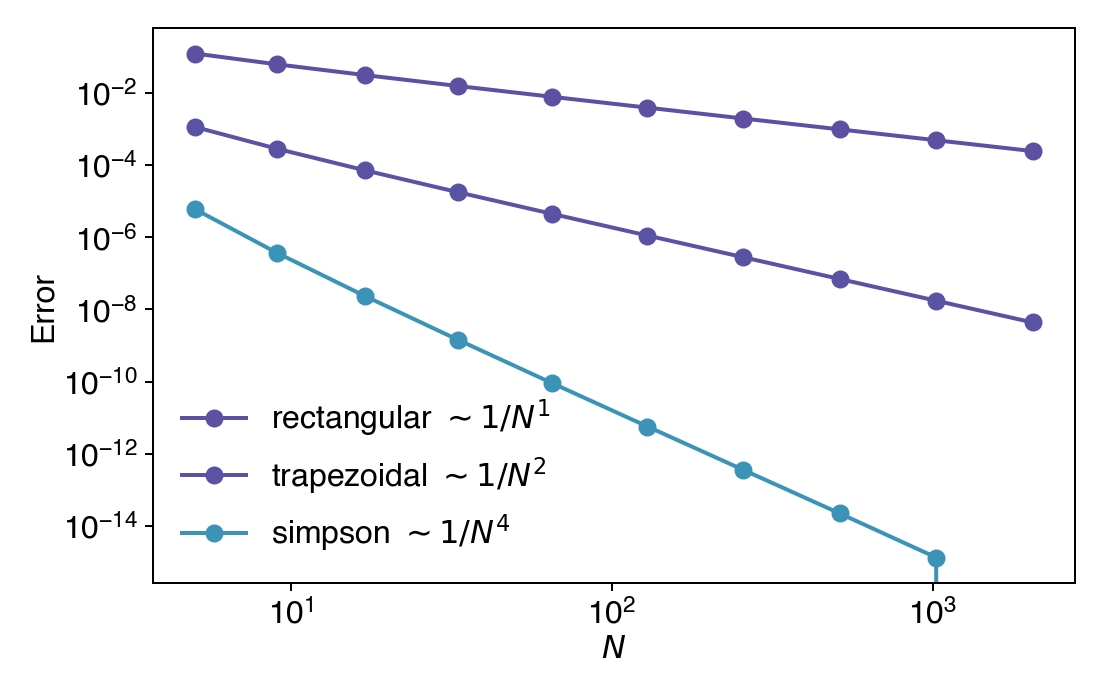

In [5]:
# see behavior of error versus N

exact = scipy.special.erf(0.5)
power_range = np.arange(2, 12)

for k, met in enumerate(['rectangular', 'trapezoidal', 'simpson']):
    
    error = np.zeros_like(power_range, dtype=float)
    n_points = np.zeros_like(power_range)

    for i, power in enumerate(power_range):

        N = 2**power + 1
        res = quadrature(erf_kernel, 0, 0.5, N, method=met)

        n_points[i] = N
        error[i] = np.abs(exact - res)

    plt.loglog(n_points, error, '-o', label=f"{met} $\sim 1 / N^{2**k}$")


plt.xlabel("$N$")
plt.ylabel("Error")
plt.legend();

# What happens in higher dimensions?

- A method of order $k$ has an error $\sim 1 / N^k$.

- For example, Simpson's method is order $k=4$.

- This is OK in 1 dimension. But what about $d$ dimensions?

  \begin{equation*}
  I = \int_{\Omega} d^d x\, f(\mathbf{x}) = \int dx_1 \int dx_2 \cdots \int dx_d\, f(\mathbf{x}).
  \end{equation*}
  
- We need $M$ points in every dimension for a total of $N = M^d$ points.

- The error $\sim 1/M^k$.

<div class="alert alert-block alert-danger">
<center>
For an order-$k$ scheme in $d$ dimensions, the error $\sim 1 / N^{k/d}$. This is not great...
</center>
</div>

# What about a Monte Carlo approach?

- Let's take our pebbles: every throw is described by a random variable $x_i$

  \begin{equation*}
   \langle x_i \rangle = \frac{\pi}{4} \cdot 4 + \left( 1 - \frac{\pi}{4} \right) \cdot 0 = \pi \qquad
   \langle x^2_i \rangle = 4\pi \qquad
   \sigma = \sqrt{4\pi-\pi^2}
  \end{equation*}

- Empirical average $X$

  \begin{equation*}
    X = \frac{1}{N} \sum_{i=1}^N x_i \qquad
    \langle X \rangle = \frac{1}{N} \sum_{i=1}^N \langle x_i \rangle = \pi
  \end{equation*}

- What is the standart deviation on the empirical average?

  \begin{equation*}
   \langle X^2 \rangle - \langle X \rangle^2 =
   \frac{1}{N^2} \sum_{i,j=1}^N \langle x_i x_j \rangle - \frac{1}{N^2} \sum_{i,j} \langle x_i \rangle \langle x_j \rangle 
   = \frac{1}{N} \sigma^2 \Rightarrow \quad \boxed{\sigma_X
   = \frac{\sigma}{\sqrt{N}}}
  \end{equation*}

<div class="alert alert-block alert-info">
<center>
Monte Carlo approaches have an error $\sim 1 / \sqrt{N}$ in any dimension!
</center>
</div>

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)